# Lab 5: Higgs Classification: Week 1
#### Mengjun Chen & Haoran Sun
## Introduction

In this project we are going to look at an inclusive search for the standard model Higgs boson in pp collisions at √ s = 13 TeV at the LHC using simulated data [A. Schuy]. The Higgs bosons are produced with large transverse momentum (pT) and decaying to a bottom quark-antiquark pair. The Higgs candidates could be reconstructed as large-radius jets using Calorimeters. Due to large QCD backgorund containmination, the direct 5-sigma observation of this Higgs channel is not accomplished yet[Phys. Rev. Lett. 120, 071802 (2018)]. We are going to use a set of training datasets to optimize event selections in order to enhance the discovery sensitivity. The optimal event selections will be applied to a selected pseudo-experiment data. The report analyzes the first data set from LHC out of two.

### Overview of ATLAS Experiment

The ATLAS detector, one of the two general purpose detectors at the LHC, is used as the example to demonstrate the general concept of collider detectors. The Higgs bosons can be detected by the ATLAS detector from proton-proton scattering at the Large Hadron Collider (LHC). The Higgs itself does not have that long life period in order for it to hit the ATLAS detector, but its child particles can. ATLAS detector has spatial resolving capabilities, which basically means that it can trace the jets back to their original starting place. Jets are referring the collimated stream of particles created from the decay of a certain particle. The jets, which ATLAS detector is interesting to measure, are called "Higgs-jets", which occur after Higgs Boson decays into a bottom-anti-bottom pair.

The detector is made by superconducting solenoid magnets, several kinds of  calorimeters, and a semiconductor tracker. Outside of that is a muon chamber, which includes three toroids. The calorimeters are spread out over different range of angles around the center axis of the trajectory. All of the calorimeters cover a pseudo-rapidity of $|\eta| < 4.9$, which is defined by $$\eta = -ln[tan(\frac{\theta}{2})]$$ where $\theta$ is the angle above the x-axis, which points towards the center of LHC ring. Moreover, the muon spectrometer measures the deflected muons over $\eta<2.7$.

### Simulated Data

Simulations that simulate real data are made of both the signal and the background, in order to optimize discrimination. The signal here is the Higgs Boson decaying into a bottom quark and an anti-bottom quark. Both the Higgs data and the background, QCD data are simulated with 14 parameters, the main two that discussed in the ATLAS article, are $Pt$ and $\eta$.

### Data Reconstruction

There are several ways that ATLAS reconstructs the produced data. The first is jet labeling. Below are two examples of jets:

**Truth Jets** carry the true information about the jets in simulations. Since they rarely leave energy deposit in the calotimeters, they do not include low-interacting particles like muons. 

**Calorimeter Jets** are made by re-clustering parts of the original jets and removing everything with a transverse momentum, Pt, that is less than $5\%$ of their parent's jet Pt.

In simulations, the truth jets are reconstructed by using the same method as real data. All other types are made from the simulations and then analyzed.

But muons and photons are reconstructed differently. Muons are reconstructed from measurements of the spectrometer, and having $Pt > 5GeV$ and $|\eta|$ < 2.5 in order to be triggered. Photons are measured from energy deposit clusters in the electromagnetic calorimeters, and are labeled differently depending on whether or not they can be traced back. The phrotons must have ${E}_{T} > 175 GeV$ and $|\eta| < 1.37 or 1.52 < |\eta| < 2.37$ to be sent to analysis.


### Trigger
Triggering a Higgs jet candidate relies largely on Pt. There is an angular separation between a Higgs decay that depends on the transverse momentum:
$$\triangle R \approx \frac{2m_{H}}{Pt}$$ $m_{H}$ here is the mass of the Higgs boson. Higgs with Pt $>$ 250 GeV and $|\eta| < 2.0$ are considered for analysis, and bottom quarks from the Higgs decay with Pt $>$ 5 GeV and $|\eta| < 2.5$ are triggered. In order to obtain a signal set, only the Higgs with the hightest Pt are used in order to reduce the systematic effects from initial state radiation. 

## Getting training datasets

The following codes are used to read the datasets for furthur analysis.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import h5py
from scipy.optimize import curve_fit
import pickle
import pandas as pd

#this sets the size of the plot to something useful
plt.rcParams["figure.figsize"] = (15,10)
mpl.rcParams['agg.path.chunksize'] = 10000.

In [2]:
infile = open("higgs_100000_pt_250_500.pkl", 'rb')
higgsData = pickle.load(infile)
infile2 = open("qcd_100000_pt_250_500.pkl", 'rb')
qcdData = pickle.load(infile2)

In [3]:
qcdData.keys()

Index(['pt', 'eta', 'phi', 'mass', 'ee2', 'ee3', 'd2', 'angularity', 't1',
       't2', 't3', 't21', 't32', 'KtDeltaR'],
      dtype='object')

In [4]:
higgsData.keys()

Index(['pt', 'eta', 'phi', 'mass', 'ee2', 'ee3', 'd2', 'angularity', 't1',
       't2', 't3', 't21', 't32', 'KtDeltaR'],
      dtype='object')

The meaning of each attributes can are listed below:

**pt**: transverse momentum of jet

**eta**: pseudorapidity

**phi**: azimuthal angle around beam

**mass**: mass in GeV

**ee2**: energy correlations between 2 jets

**ee3**: energy correlations between 3 jets

**d2**: two prong jet disriminant given by $ (\frac{ee_2}{ee_3})^3 $

**angularity**: describes shape of the jet

**t1**: (subjettiness) variance of detections of 1 branch coming from a jet

**t2**: variance of detections of 2 branches coming from a jet

**t3**: variance of detections of 3 branches coming from a jet

**t21**: $\frac{t2}{t1}$

**t32**: $\frac{t3}{t2}$

**KtDeltaR**: size difference between two sub-jets

## Data Analysis

Let's first plot the Transverse momentum(pt) of both QCD and Higgs, as it was the main way of tagging jets.

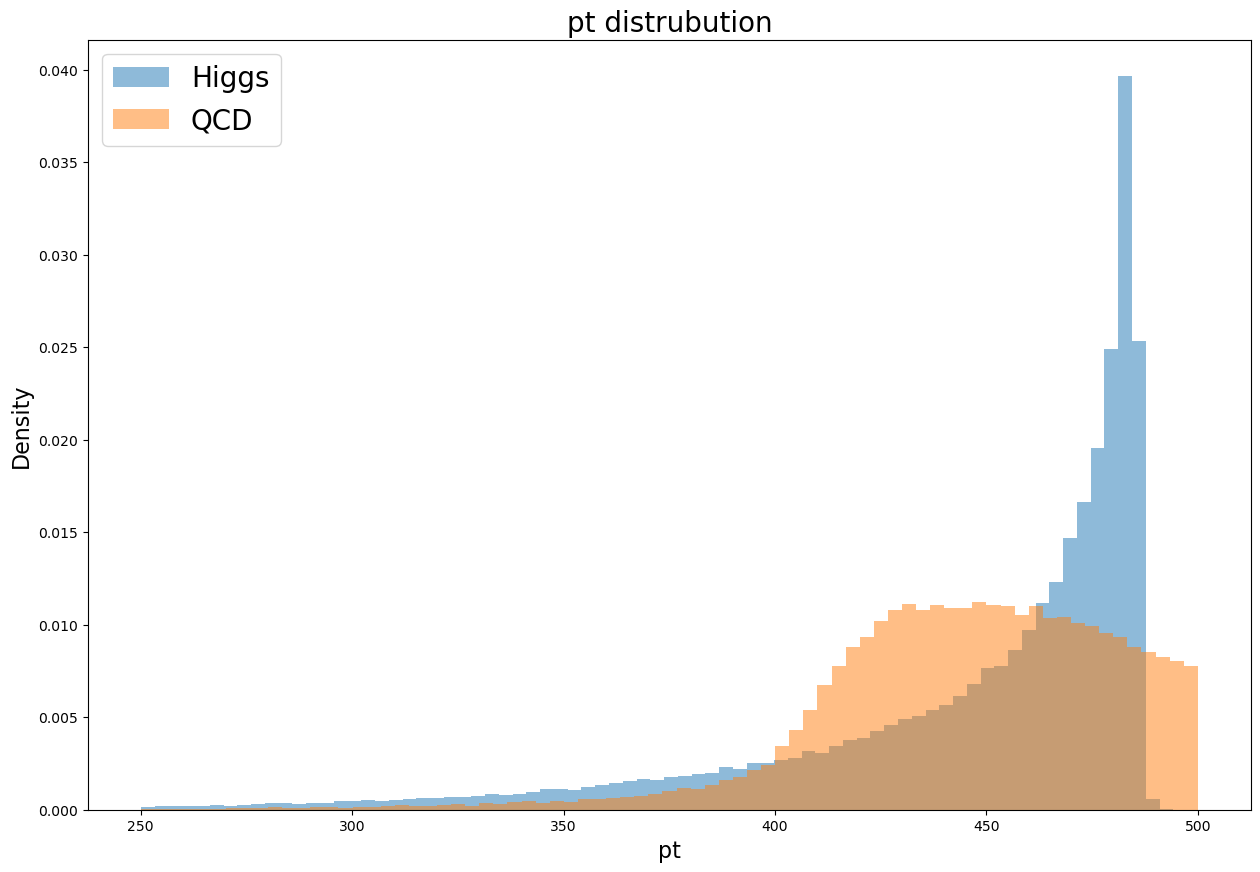

In [5]:
plt.title('pt distrubution', fontsize = 20)
plt.hist(higgsData['pt'], bins=75, alpha=0.5, density=True, label='Higgs')
plt.hist(qcdData['pt'], bins=75, alpha=0.5, density=True, label='QCD')
plt.legend(prop={"size":20})
plt.xlabel('pt', fontsize = 16)
plt.ylabel('Density', fontsize = 16)
plt.show()

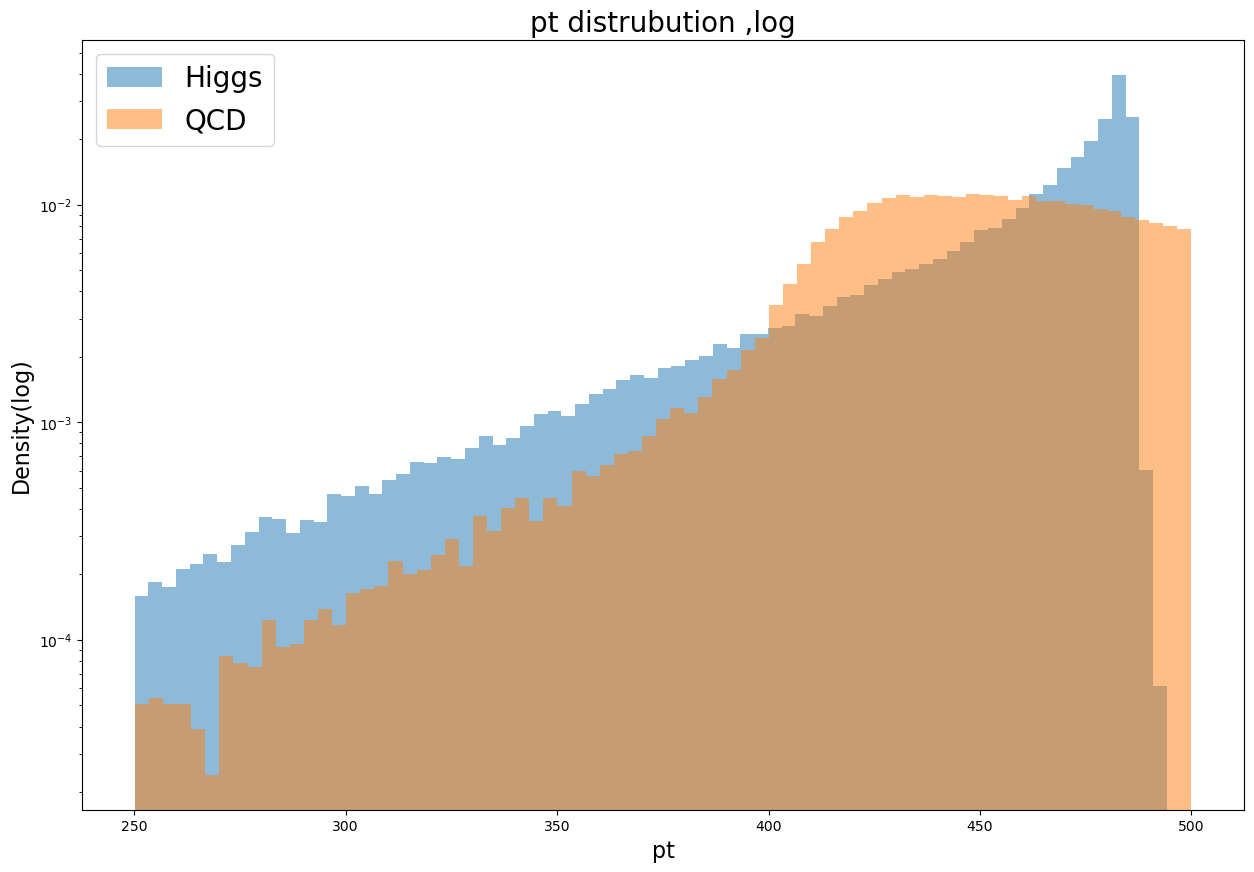

In [6]:
plt.yscale('log')
plt.title('pt distrubution ,log', fontsize = 20)
plt.hist(higgsData['pt'], bins=75, alpha=0.5, density=True, label='Higgs')
plt.hist(qcdData['pt'], bins=75, alpha=0.5, density=True, label='QCD')
plt.legend(prop={"size":20})
plt.xlabel('pt', fontsize = 16)
plt.ylabel('Density(log)', fontsize = 16)
plt.show()

The Higgs-jet has a more concentrated pt distribution(between 450 to 500), where the distribution of QCD are more spreaded out. A threshold for distinguishing the signal(Higgs boson) could be around 460.

We can then look into Pseudorapidity(QCD) in both sets

In [7]:
def MakingPlots(attribute, title):
    plt.title(f'{title} distrubution')
    plt.hist(higgsData[attribute], bins=75, alpha=0.5, density=True, label='Higgs')
    plt.hist(qcdData[attribute], bins=75, alpha=0.5, density=True, label='QCD')
    plt.legend(prop={"size":20})
    plt.xlabel(f'{attribute}',fontsize = 16)
    plt.ylabel('Density',fontsize = 16)
    plt.show()

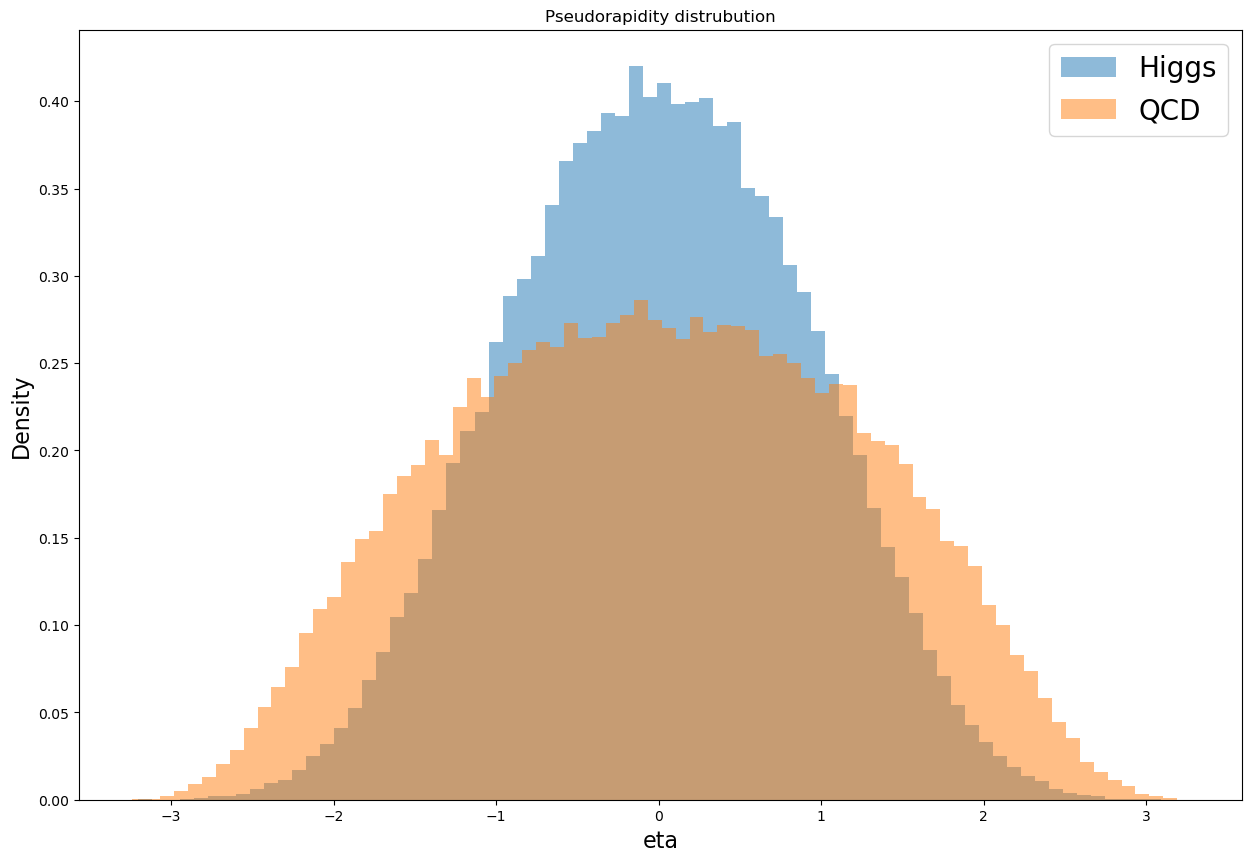

In [8]:
MakingPlots('eta', 'Pseudorapidity')

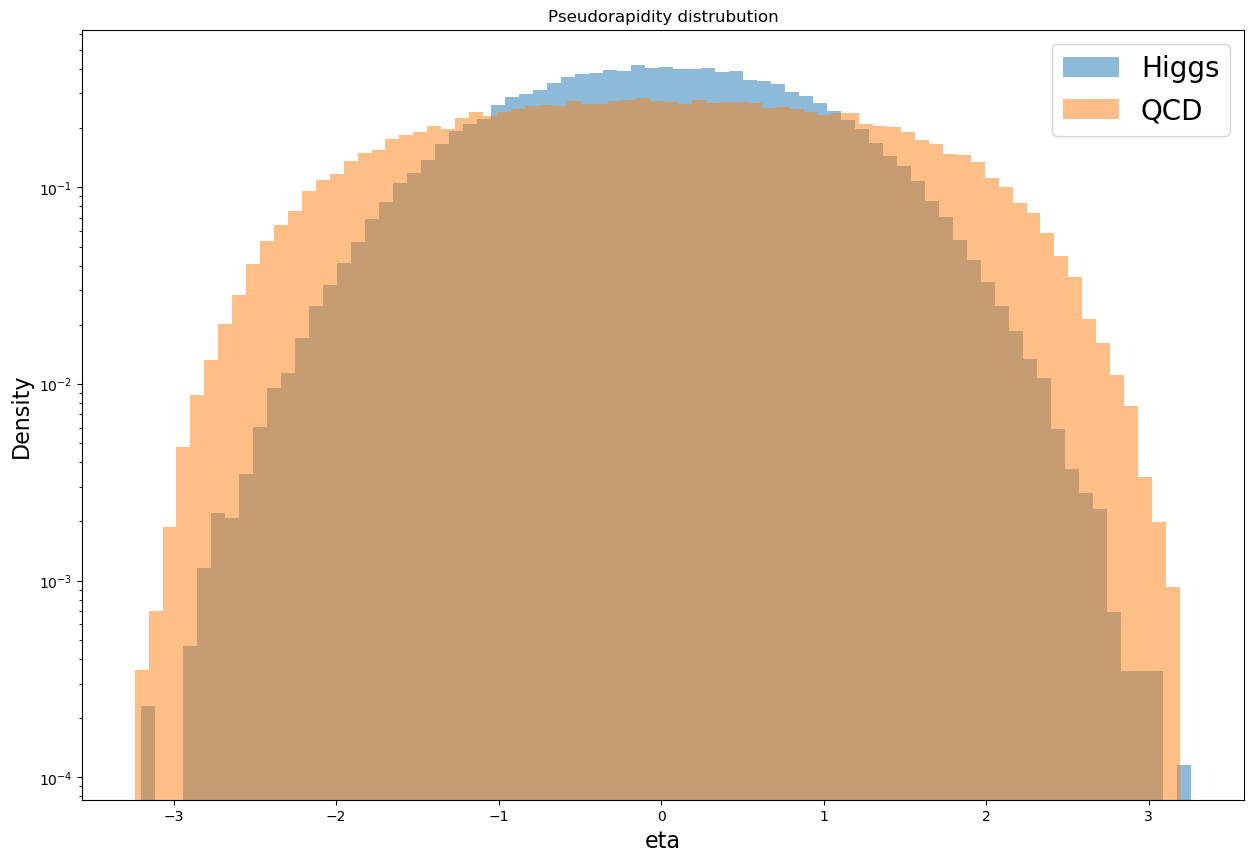

In [9]:
plt.yscale('log')
MakingPlots('eta', 'Pseudorapidity')

Both distributions look similar to a Gaussian distritutions, in which Higgs has a smaller standard deviation.

In [10]:
mean = np.mean(higgsData['eta'])
std = np.std(higgsData['eta'])
print(f'Higgs Mean: {mean:.2f}, std: {std:.2f}')
mean = np.mean(qcdData['eta'])
std = np.std(qcdData['eta'])
print(f'  QCD Mean: {mean:.2f}, std: {std:.2f}')

Higgs Mean: -0.00, std: 0.90
  QCD Mean: -0.00, std: 1.22


The distribution comparisons of all the other attributs are plotted below:

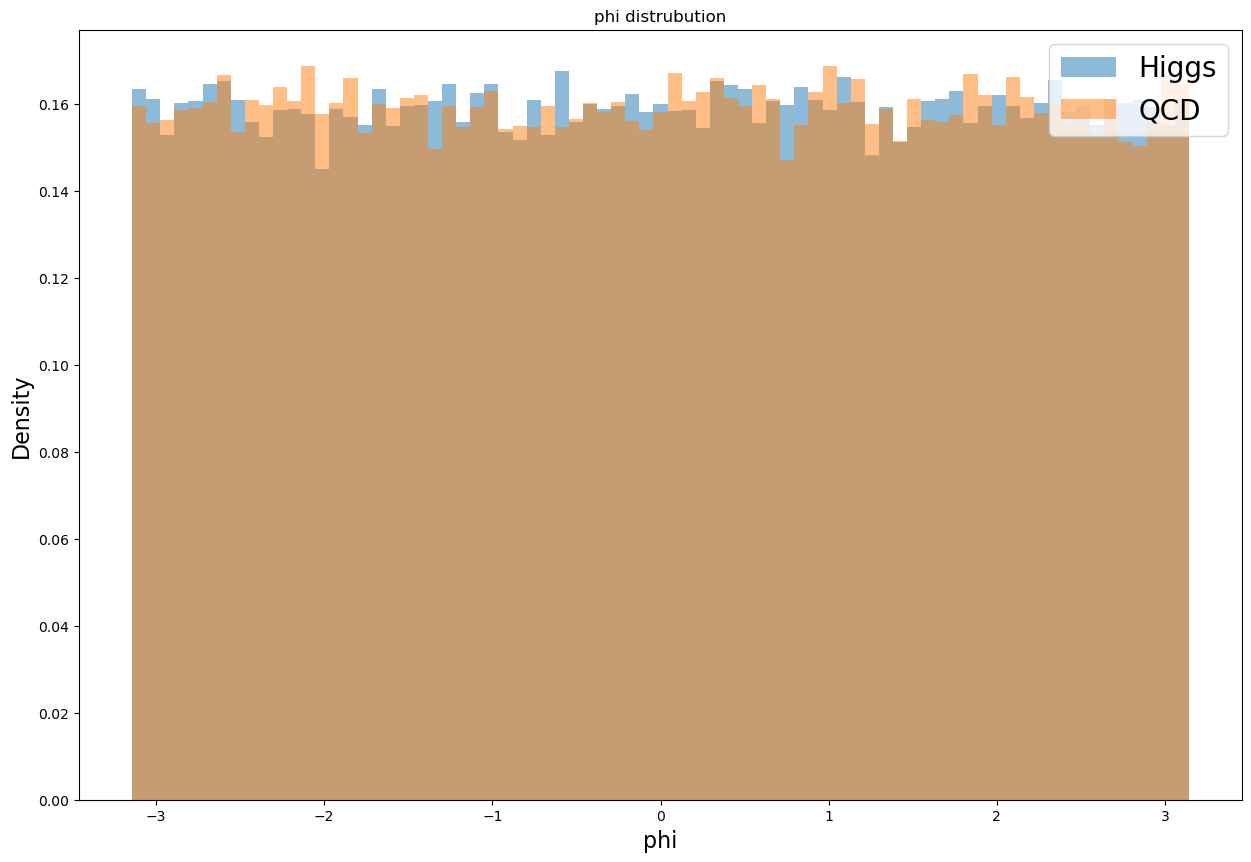

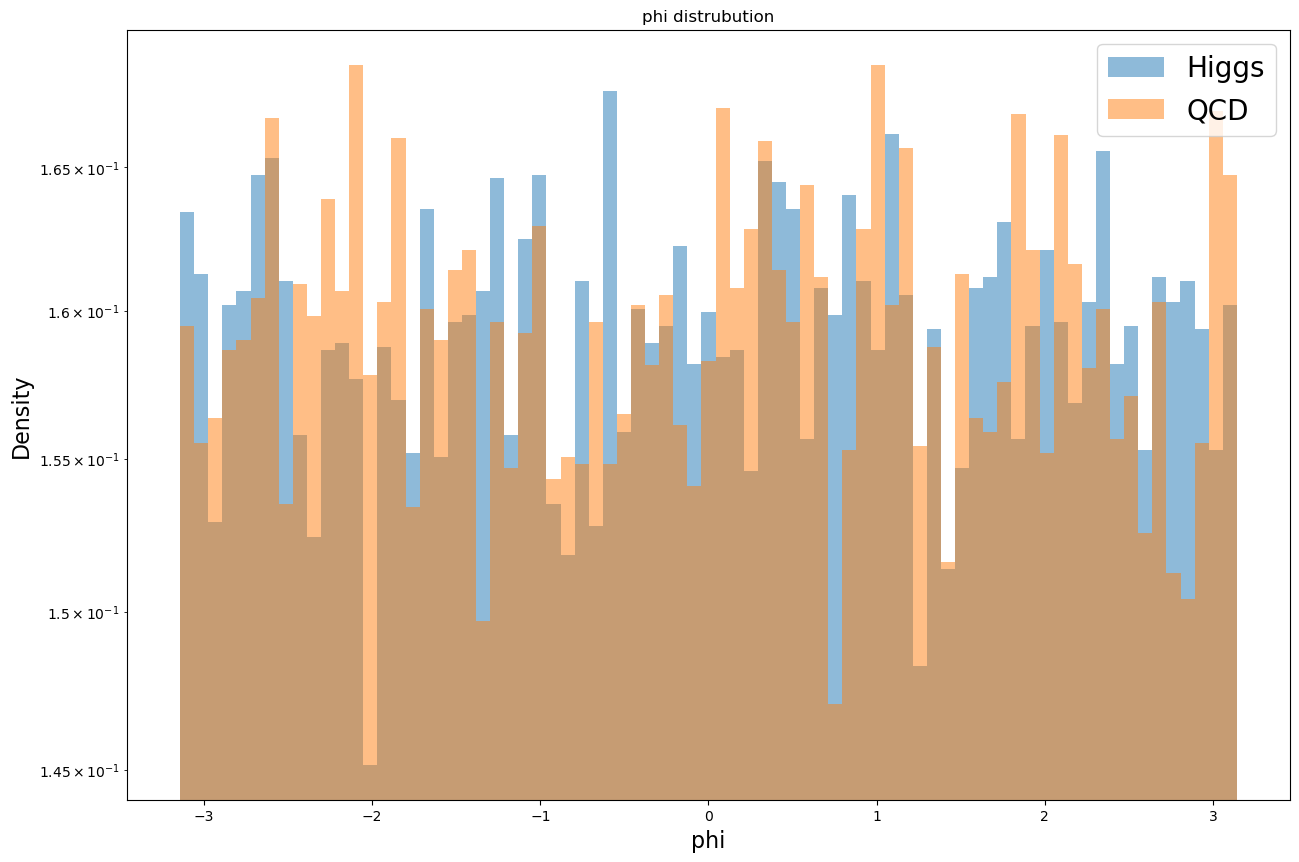

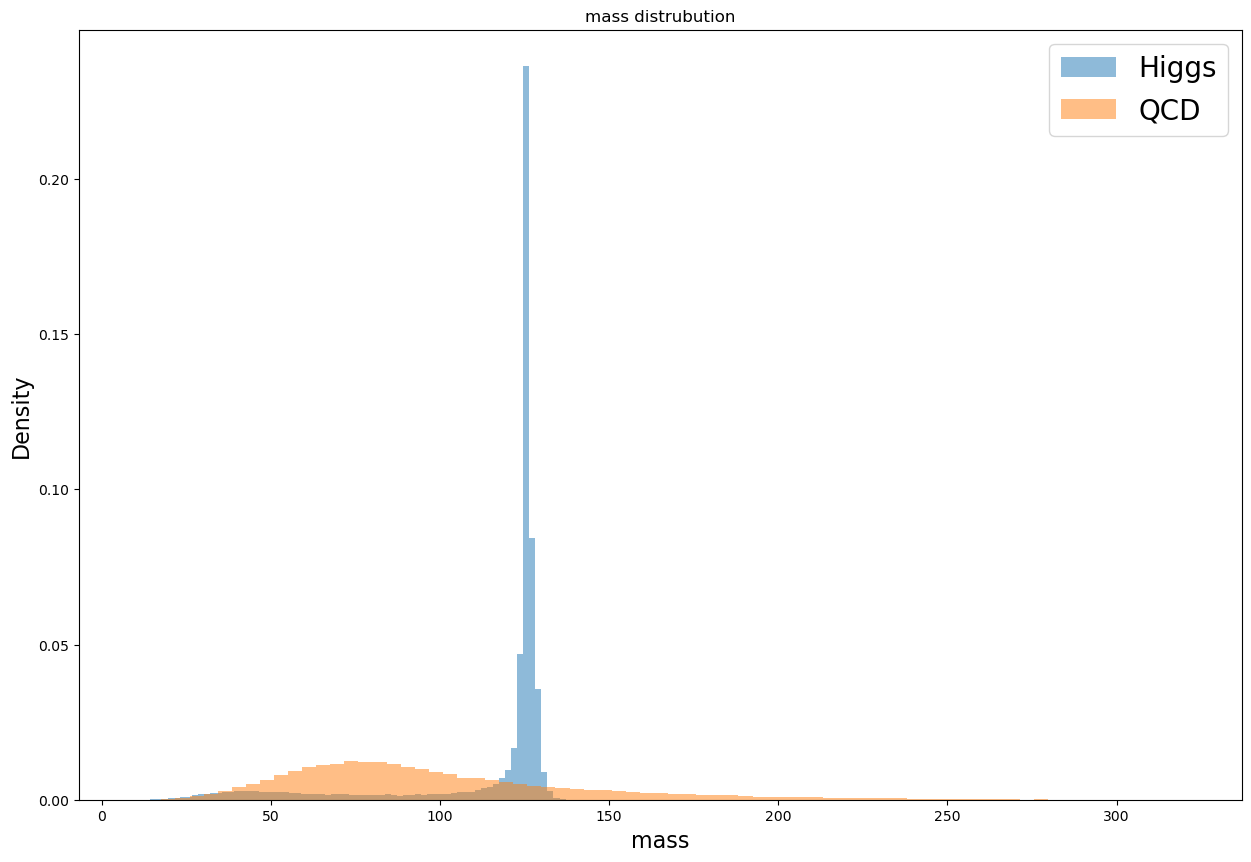

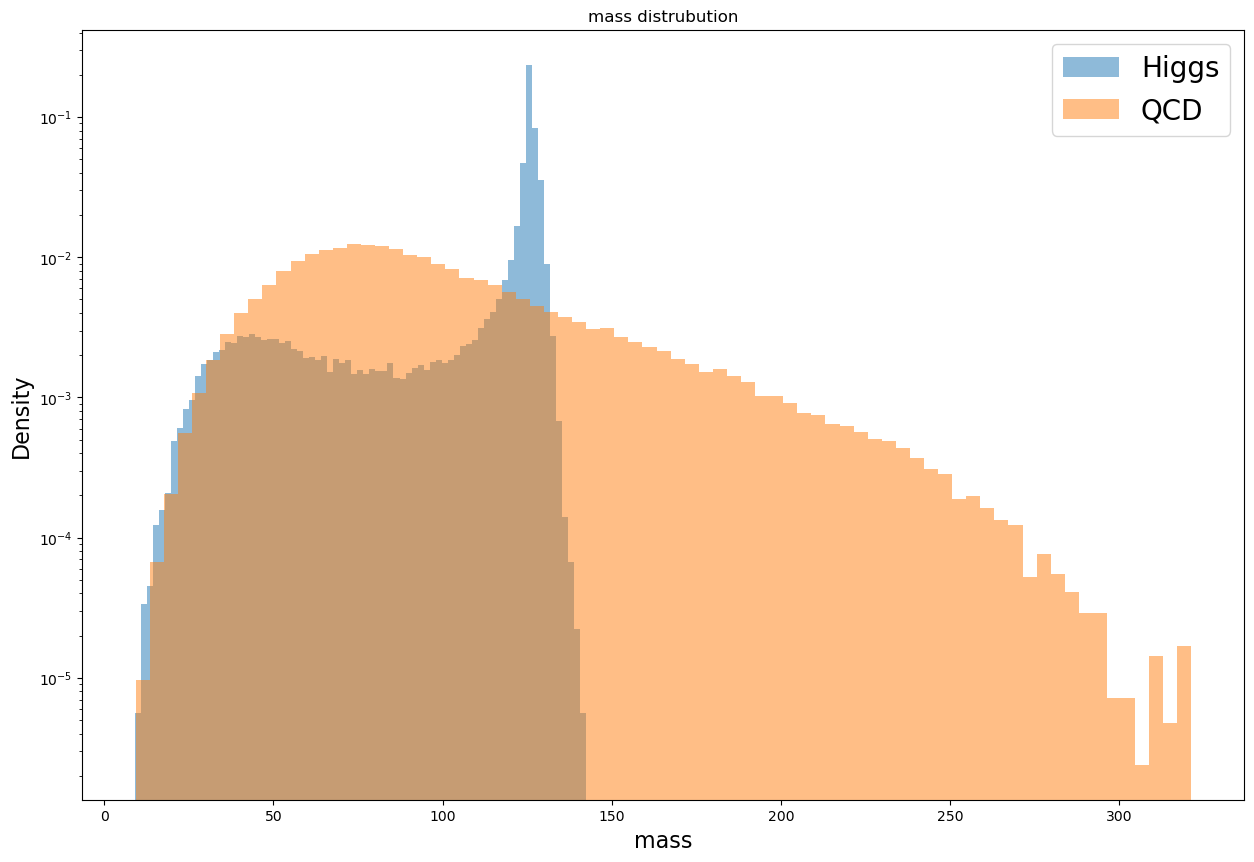

In [ ]:
for i in range(2, 14):
    key = higgsData.keys()[i]
    MakingPlots(key, key)
    plt.yscale('log')
    MakingPlots(key, key)

For all those attributes, the distributions of mass, ee2, t2, t3, t21 and KtDeltaR has a larger discrimination power between the signal(higgs) and background(QCD). Those features may be helpful for distinguishing our signal in the future labs.

## The expected discovery sensitivity

$N_{higgs} = 100$ and $N_{QCD} = 20000$. We know the background will be having a Poisson distribution(with mean of $N_{QCD}$), since it is discrete. 

THe Higgs Boson signal will be $N_{higgs} + N_{QCD} = 20100$ 

In [ ]:
signal = 20100
mean = 20000
prob = stats.poisson.cdf(signal,mean)

In [ ]:
sigma = stats.norm.ppf(prob)

In [ ]:
sigma

The sigma value is only 0.711 right now, far below than 5-sigma threshold.

For 5 sigma threshold:

In [ ]:
prob5Sigma = stats.norm.cdf(5)

In [ ]:
num = stats.poisson.ppf(prob5Sigma, mean)
num

We need to detect at least 711 higgs signal.

## Discovery Sensitivity Optimization

As mentioned in previous section, For all those attributes, the distributions of mass, ee2, t2, t3, t21 and KtDeltaR has a larger discrimination power between the signal(higgs) and background(QCD). Those features may be helpful for distinguishing our signal in the future labs.

Also, we could compare the distribution of signal and background to find out the how much the signal is contaminated by the background and filter out the background by some amount.

In [ ]:
!jupyter nbconvert --to html lab5_notebook.ipynb